# Import Libraries

In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from skimage.transform import resize
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adamax

print ('modules loaded')

2024-03-14 22:10:42.094961: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-14 22:10:42.095065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-14 22:10:42.281305: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules loaded


# Defining Labels

In [2]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Loading Dataset

In [3]:
train_dir = '/kaggle/input/brain-tumor-mri-dataset/Training/'
test_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing/'


X_train = [] #Training Dataset
Y_train = [] #Training Labels

image_size=224

for label in labels:
    path = os.path.join(train_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
        img_array = plt.imread(os.path.join(path, img))
        img_resized = resize(img_array, (image_size, image_size, 3))
        X_train.append(img_resized)
        Y_train.append(class_num)

for label in labels:
    path = os.path.join(test_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
        img_array = plt.imread(os.path.join(path, img))
        img_resized = resize(img_array, (image_size, image_size, 3))
        X_train.append(img_resized)
        Y_train.append(class_num)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [4]:
#Number of sample = 7023
X_train.shape 

(7023, 224, 224, 3)

In [5]:
# Shuffling data
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

In [6]:
#After shuffling sample size remains same
X_train.shape

(7023, 224, 224, 3)

# Ploting Some Images

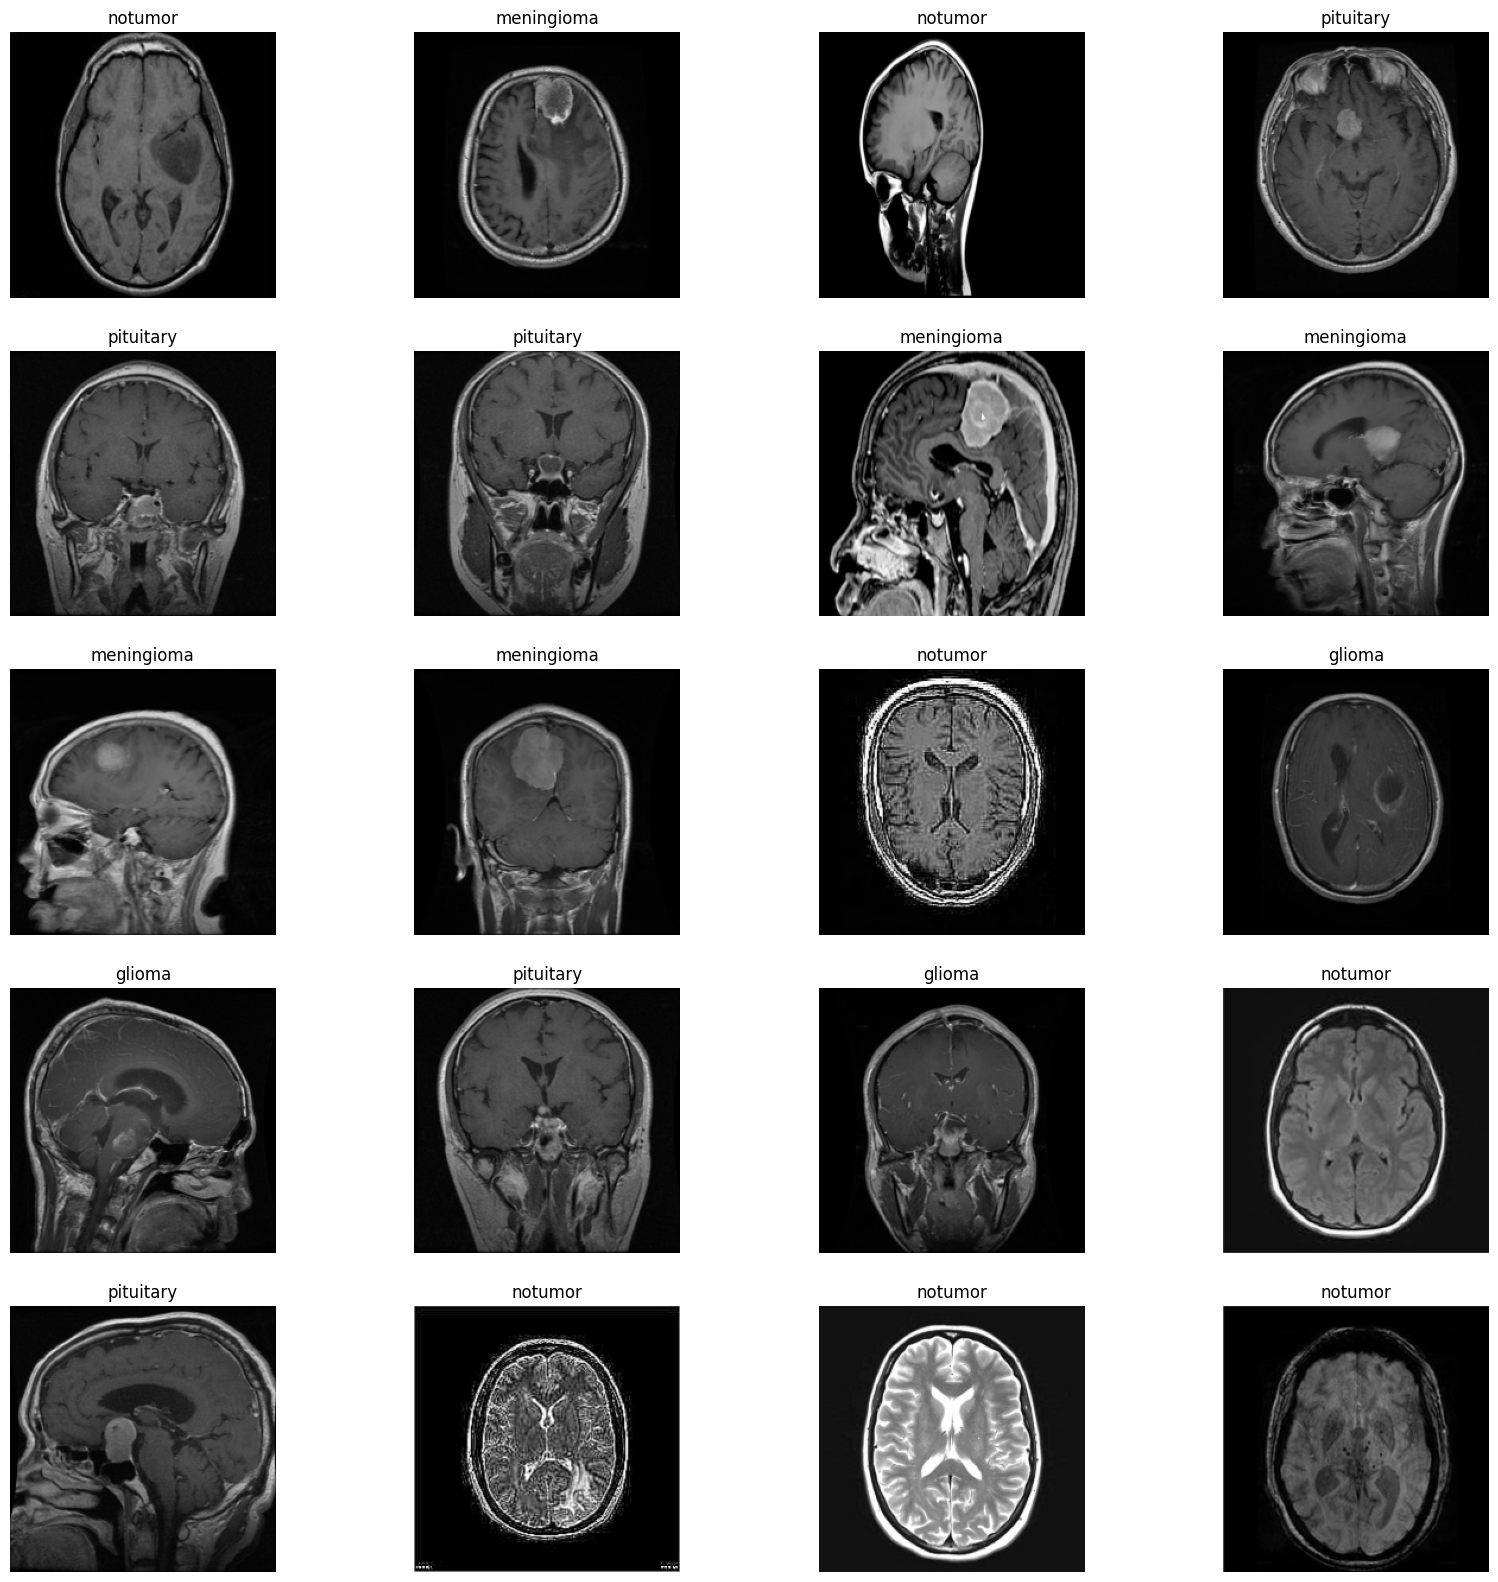

In [7]:
#plotting the images
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(X_train[i])
    plt.title(labels[Y_train[i]])
    plt.axis("off")
plt.show()

# Splitting data into : Train, Test, Valid as 70, 20, 10 ratio

In [8]:
# Split the data into training and testing and validation
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

# converting string to categorical

In [9]:
# convert string to categorical
from keras.utils import to_categorical
y_train_new = []
y_valid_new = []
y_test_new = []

for i in range(len(Y_train)):
    y_train_new.append(to_categorical(Y_train[i], num_classes=4))

for i in range(len(Y_valid)):
    y_valid_new.append(to_categorical(Y_valid[i], num_classes=4))

for i in range(len(Y_test)):
    y_test_new.append(to_categorical(Y_test[i], num_classes=4))

y_train_new = np.array(y_train_new)
y_valid_new = np.array(y_valid_new)
y_test_new = np.array(y_test_new)


# Defining the model

In [10]:
# bulding deep learning model
from tensorflow.keras.applications import Xception
img_shape = (224, 224, 3)
base_model =Xception(input_shape=img_shape, include_top=False, weights='imagenet',
                                            pooling= 'max')

model = Sequential([
    base_model,
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')
])
model.compile(Adamax(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21124268 (80.58 MB)
Trainable params: 21069740 (80.37 MB)
Non-trainable params: 54528 (213.00 KB)
___________

# Training the model

In [11]:
history = model.fit(X_train, y_train_new, batch_size=32, epochs=10, validation_data=(X_valid, y_valid_new))

Epoch 1/10


I0000 00:00:1710454473.815416      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


158/158 [==============================] - 110s 487ms/step - loss: 0.7043 - accuracy: 0.7073 - val_loss: 0.2229 - val_accuracy: 0.9342
Epoch 2/10
158/158 [==============================] - 79s 499ms/step - loss: 0.1085 - accuracy: 0.9654 - val_loss: 0.0789 - val_accuracy: 0.9751
Epoch 3/10
158/158 [==============================] - 79s 498ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0553 - val_accuracy: 0.9769
Epoch 4/10
158/158 [==============================] - 79s 499ms/step - loss: 0.0317 - accuracy: 0.9905 - val_loss: 0.0748 - val_accuracy: 0.9769
Epoch 5/10
158/158 [==============================] - 79s 500ms/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 0.0538 - val_accuracy: 0.9840
Epoch 6/10
158/158 [==============================] - 79s 500ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0725 - val_accuracy: 0.9769
Epoch 7/10
158/158 [==============================] - 79s 499ms/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0390 - val_accuracy: 0.

# Accurcy and Loss visualization

44/44 [==============================] - 9s 203ms/step - loss: 0.0730 - accuracy: 0.9801


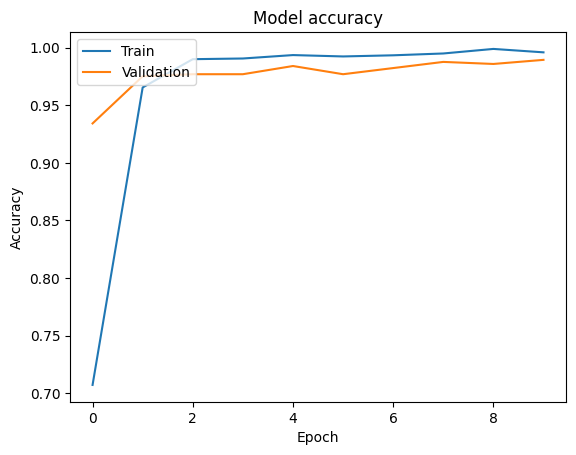

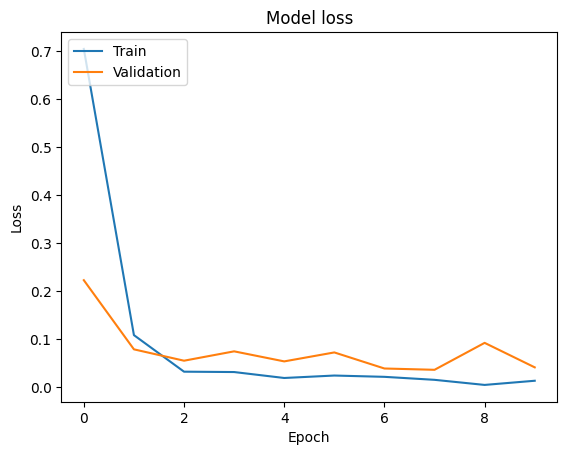

In [12]:
# Evaluate the model
model.evaluate(X_test, y_test_new)

# Plot the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save the model

In [13]:
# Save the model
model.save('brain_tumor.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Confusion matrix

44/44 [==============================] - 7s 132ms/step


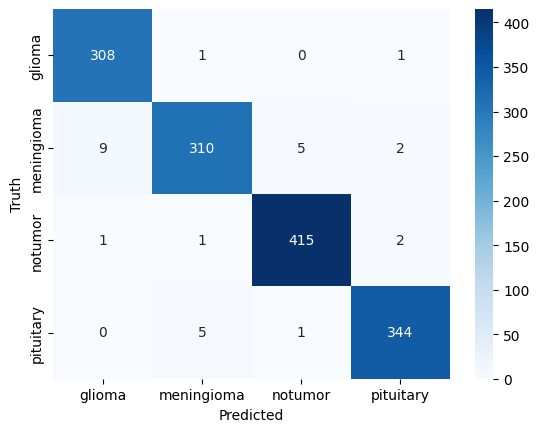

In [14]:
# Load the model
from keras.models import load_model
model = load_model('brain_tumor.h5')

# Predict the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Classification report

In [15]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      glioma       0.97      0.99      0.98       310
  meningioma       0.98      0.95      0.96       326
     notumor       0.99      0.99      0.99       419
   pituitary       0.99      0.98      0.98       350

    accuracy                           0.98      1405
   macro avg       0.98      0.98      0.98      1405
weighted avg       0.98      0.98      0.98      1405



# Visualizing Model Predictions

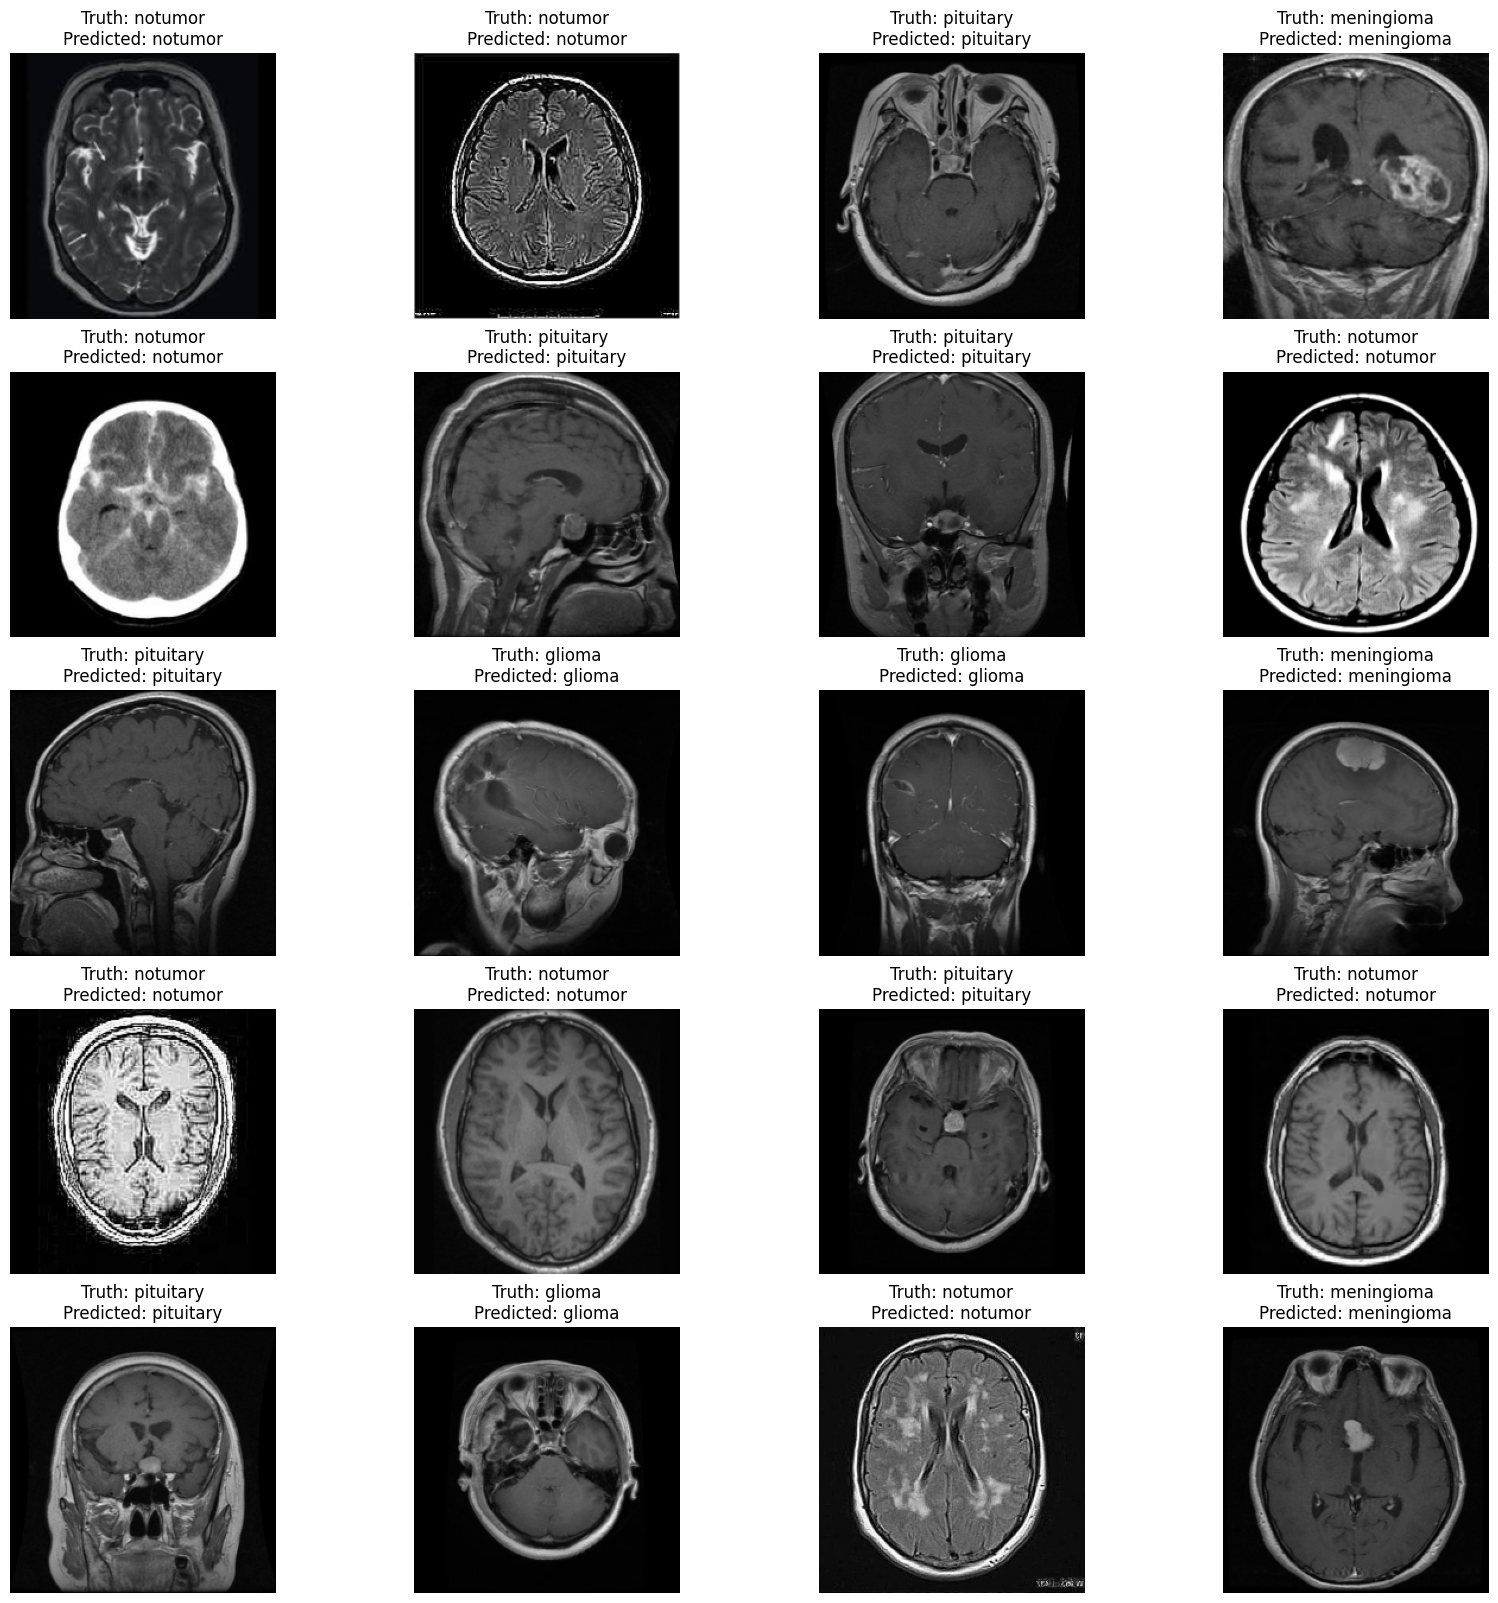

In [16]:
# Visualizing Model Predictions on test data
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(X_test[i])
    plt.title(f"Truth: {labels[Y_test[i]]}\nPredicted: {labels[y_pred[i]]}")
    plt.axis('off')
plt.show()

In [17]:
#testing accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

0.9800711743772242
